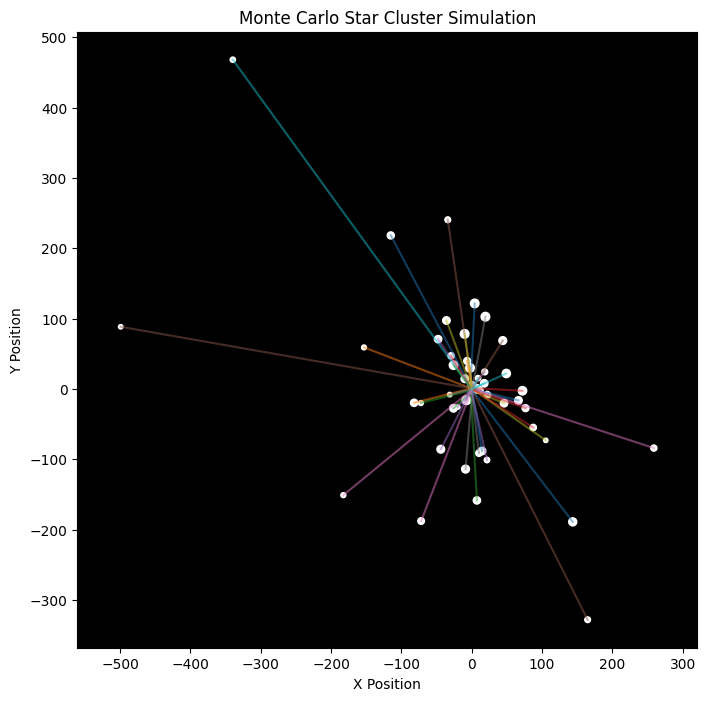

In [4]:
# =========================
# STAR CLUSTER SIMULATION
# =========================

# Import numpy for numerical operations
import numpy as np

# Import matplotlib for plotting
import matplotlib.pyplot as plt

# -------------------------
# PHYSICAL CONSTANTS
# -------------------------

# Gravitational constant (scaled for numerical stability)
# Real G = 6.674e-11, but that causes numerical issues at small scales
G = 1.0  

# -------------------------
# SIMULATION PARAMETERS
# -------------------------

# Number of stars in the cluster
N = 50

# Total time steps to simulate
num_steps = 500

# Time interval between steps
dt = 0.01

# -------------------------
# MONTE CARLO INITIALIZATION
# -------------------------

# Random seed ensures reproducibility
np.random.seed(42)

# Random initial positions (x, y) for each star
# Shape: (N, 2)
positions = np.random.uniform(-1, 1, size=(N, 2))

# Random initial velocities (vx, vy)
velocities = np.random.uniform(-0.1, 0.1, size=(N, 2))

# Random masses for stars
# All stars are similar but not identical
masses = np.random.uniform(0.5, 2.0, size=N)

# -------------------------
# FORCE CALCULATION FUNCTION
# -------------------------

def compute_gravitational_forces(positions, masses):
    """
    Computes gravitational force on each star due to all others.

    Parameters:
    positions : numpy array of shape (N, 2)
        Positions of all stars
    masses : numpy array of shape (N,)
        Mass of each star

    Returns:
    forces : numpy array of shape (N, 2)
        Net force acting on each star
    """

    # Initialize force array with zeros
    forces = np.zeros_like(positions)

    # Loop over all star pairs
    for i in range(N):
        for j in range(N):

            # A star does not exert force on itself
            if i == j:
                continue

            # Vector from star i to star j
            r_vector = positions[j] - positions[i]

            # Distance between stars
            distance = np.linalg.norm(r_vector)

            # Softening parameter prevents division by zero
            softening = 0.01

            # Newton's gravitational force magnitude
            force_magnitude = G * masses[i] * masses[j] / (distance**2 + softening**2)

            # Direction of force (unit vector)
            force_direction = r_vector / distance

            # Add force contribution
            forces[i] += force_magnitude * force_direction

    return forces

# -------------------------
# TIME EVOLUTION LOOP
# -------------------------

# Store positions for plotting
trajectory = []

for step in range(num_steps):

    # Compute gravitational forces at current positions
    forces = compute_gravitational_forces(positions, masses)

    # Newton's second law: F = m * a  →  a = F / m
    accelerations = forces / masses[:, np.newaxis]

    # Update velocities: v = v + a * dt
    velocities += accelerations * dt

    # Update positions: x = x + v * dt
    positions += velocities * dt

    # Store positions for visualization
    trajectory.append(positions.copy())

# Convert trajectory list to numpy array
trajectory = np.array(trajectory)

# -------------------------
# VISUALIZATION
# -------------------------

plt.figure(figsize=(8, 8))

# Plot final positions of stars
plt.scatter(
    trajectory[-1, :, 0],
    trajectory[-1, :, 1],
    s=masses * 20,     # Size scaled by mass
    c="white"
)

# Plot trajectories
for i in range(N):
    plt.plot(
        trajectory[:, i, 0],
        trajectory[:, i, 1],
        alpha=0.5
    )

# Styling the plot
plt.title("Monte Carlo Star Cluster Simulation")
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.gca().set_facecolor("black")
plt.grid(False)
plt.axis("equal")

plt.show()
